In [3]:
!wget https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv

--2024-04-10 07:58:46--  https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23105 (23K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2024-04-10 07:58:46 (17.5 MB/s) - ‘diabetes.csv.1’ saved [23105/23105]



In [6]:
import pandas as pd
data = pd.read_csv("diabetes.csv.1")

In [7]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
feature_col = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
X = data[feature_col]
y = data.Outcome

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=41)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=41)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test,y_pred)


In [32]:
c_matrix

array([[99,  0],
       [ 0, 55]])

Text(0.5, 23.52222222222222, 'Predicted label')

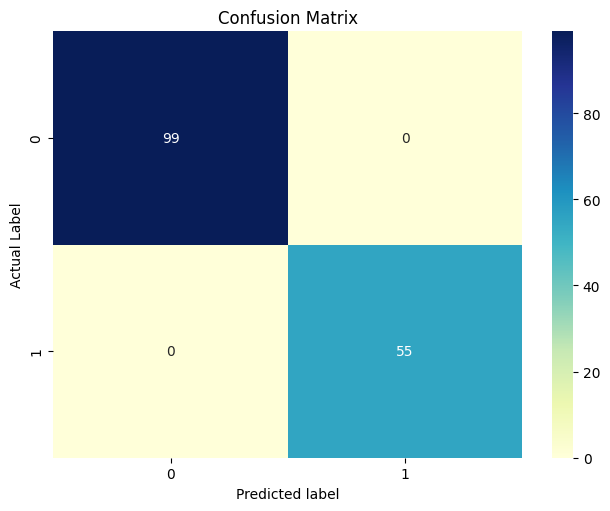

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names = [0,1]
#fig, ax = plt.subplot()
plt.xticks(class_names)
plt.yticks(class_names)
sns.heatmap(pd.DataFrame(c_matrix),annot=True,cmap='YlGnBu',fmt='g')
#ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted label")

In [34]:
from sklearn.metrics import classification_report
names = ['without diabeties','with diabeties']
print(classification_report(y_test,y_pred,target_names=names))

                   precision    recall  f1-score   support

without diabeties       1.00      1.00      1.00        99
   with diabeties       1.00      1.00      1.00        55

         accuracy                           1.00       154
        macro avg       1.00      1.00      1.00       154
     weighted avg       1.00      1.00      1.00       154

